In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.datasets import load_boston

In [59]:
bot = load_boston()

In [60]:
import pandas as pd

In [61]:
df = pd.DataFrame(bot.data, columns=bot.feature_names)

In [62]:
df["MEDV"] = bot.target

In [63]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [64]:
cor = df.corr()

In [65]:
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [66]:
import seaborn as sns

In [67]:
from matplotlib import pyplot as plt

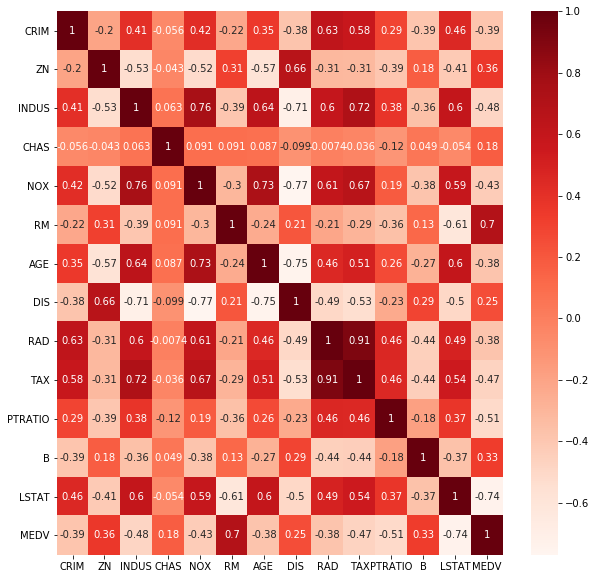

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [69]:
y = df["MEDV"]

In [70]:
x = df.drop(["CHAS", "DIS", "AGE", "B", "RAD", "MEDV" ], axis=1)

In [71]:
x

,CRIM,ZN,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.573,6.120,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.573,6.976,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.573,6.794,273.0,21.0,6.48


In [72]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=9)

In [75]:
lg = LinearRegression()
sr = SVR()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [76]:
lg.fit(xtrain, ytrain)
sr.fit(xtrain, ytrain)
dt.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [77]:
pl = lg.predict(xtest)
ps = sr.predict(xtest)
pdt = dt.predict(xtest)
pr = rf.predict(xtest)

In [83]:
pdf = pd.DataFrame({"yreal": ytest, "logreg": pl, "svr":ps, "dtree": pdt, "ranfor": pr})

In [84]:
pdf.head()

,yreal,logreg,svr,dtree,ranfor
464,21.4,20.175186,14.979493,19.5,24.376
419,8.4,17.697784,14.852172,27.5,13.836
277,33.1,30.300989,24.423056,32.0,30.814
491,13.6,17.888450,14.763073,15.2,16.188
337,18.5,20.345884,24.119639,22.5,19.878


In [89]:
from sklearn.metrics import mean_absolute_error

In [90]:
al = mean_absolute_error(ytest, pl)
asvr = mean_absolute_error(ytest, ps)
ad = mean_absolute_error(ytest, pdt)
ar = mean_absolute_error(ytest, pr)

In [91]:
al, asvr, ad, ar

(3.727284487681462, 5.611605499398608, 3.6031496062992128, 2.416086614173229)

In [92]:
vr = VotingRegressor(
                estimators=[("Lg", lg), ("SVR", sr), ("dt", dt), ("RF", rf)]
)

In [93]:
vr.fit(xtrain,ytrain)

VotingRegressor(estimators=[('Lg',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('SVR',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False)),
                            ('dt',
                             DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_...
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,

In [94]:
pvr = vr.predict(xtest)

In [96]:
pdf["PVR"] = pvr

In [97]:
pdf

,yreal,logreg,svr,dtree,ranfor,PVR
464,21.4,20.175186,14.979493,19.5,24.376,19.941420
419,8.4,17.697784,14.852172,27.5,13.836,18.467239
277,33.1,30.300989,24.423056,32.0,30.814,29.439511
491,13.6,17.888450,14.763073,15.2,16.188,16.443131
337,18.5,20.345884,24.119639,22.5,19.878,21.658881
...,...,...,...,...,...,...
455,14.1,19.219027,14.948813,15.2,15.692,16.252210
295,28.6,30.848582,23.032462,26.6,27.289,26.998011
139,17.8,17.357896,19.194886,15.6,16.337,17.135945
21,19.6,18.274941,22.581724,18.4,19.399,19.685166


In [98]:
al, asvr, ad, ar

(3.727284487681462, 5.611605499398608, 3.6031496062992128, 2.416086614173229)

In [99]:
av = mean_absolute_error(ytest, pvr)

In [100]:
av

3.1641641820398156